In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
cancer=pd.read_csv('data.csv')

In [10]:
pd.set_option('display.max_columns',50) # to make sure all columns get displayed

In [11]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Analysis
* Diagnosis tells about the type of cancer as B or M ('Benign', 'Malignant')
* Type of cancer is based on the rest of the variables hence 'Diagnosis' is the output variable.
* Encoding of diagnosis variable needs to be done.
* All othe variables are in numerical form, hence no encoding is needed.
* Since it is a random forest model, feature scaling is not necessory here. It is not distence based model.
* The last column unnamed is completely empty so it can be removed.

In [12]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [13]:
cancer.shape

(569, 33)

In [14]:
columns=['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
# classes=['Benign', 'Malignant']cancer.shape
cancer.shape

(569, 33)

In [15]:
# Encoding the output variable
cancer['diagnosis']=cancer['diagnosis'].map({'B':0,'M':1})

In [16]:
# Since the last column does not make sense, lets remove it.
cancer=cancer.drop(['id','Unnamed: 32'],axis=1)

In [18]:
cancer.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [19]:
cancer.shape

(569, 31)

In [20]:
# Assigning independent and dependent variables:

feature_shape=cancer.iloc[:,cancer.columns!='diagnosis']
feature_class=cancer.iloc[:,cancer.columns=='diagnosis']

X_train,X_test,y_train,y_test=train_test_split(feature_shape,feature_class,train_size=0.80,random_state=42)

In [21]:
# set the random state for reproducibility

fit_rf=RandomForestClassifier()

### Hypertuning of parameters

In [22]:
y_train=y_train['diagnosis']

In [23]:
type(y_train)

pandas.core.series.Series

## GridSearchCV allows to select correct set of hyperparameter values. This step takes time.

In [25]:
# Providing the different values of hyperparameters.
param_dist={'max_depth':[2,3,4,8],
           'max_features':['auto','sqrt','log2',None],
           'bootstrap':[True,False],
           'criterion':['gini','entropy']}
# Running GridSearchCV to check for all the different PnCs of these parameter values
cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist,verbose=0,n_jobs=3)

# FItting the train set, so thet grid search is executed on this dataset
cv_rf.fit(X_train,y_train)

# Main dataset: select small datasers from that, this is called bootstrapping

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [26]:
# Providing the different values of hyperparameters.
param_dist={'max_depth':[2,3,4,8],
           'max_features':['auto','sqrt','log2',None],
           'bootstrap':[True,False],
           'criterion':['gini','entropy']}
# Running GridSearchCV to check for all the different PnCs of these parameter values
cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist,verbose=1,n_jobs=3)

# FItting the train set, so thet grid search is executed on this dataset
cv_rf.fit(X_train,y_train)


Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             verbose=1)

In [27]:
# Providing the different values of hyperparameters.
param_dist={'max_depth':[2,3,4,8],
           'max_features':['auto','sqrt','log2',None],
           'bootstrap':[True,False],
           'criterion':['gini','entropy']}
# Running GridSearchCV to check for all the different PnCs of these parameter values
cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist,verbose=3,n_jobs=3)

# FItting the train set, so thet grid search is executed on this dataset
cv_rf.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             verbose=3)

In [28]:
# Printing the best parameters by using best_params
print('Best Parameters using grid search:\n', cv_rf.best_params_)

Best Parameters using grid search:
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}


In [30]:
# finally the best parameters are specified
fit_rf.set_params(criterion='entropy',
                 max_features='sqrt',
                 bootstrap= True,
                 max_depth= 8)

RandomForestClassifier(criterion='entropy', max_depth=8)

In [31]:
fit_rf.fit(X_train,y_train)
y_pred=fit_rf.predict(X_test)

In [43]:
cm=confusion_matrix(y_test,y_pred)

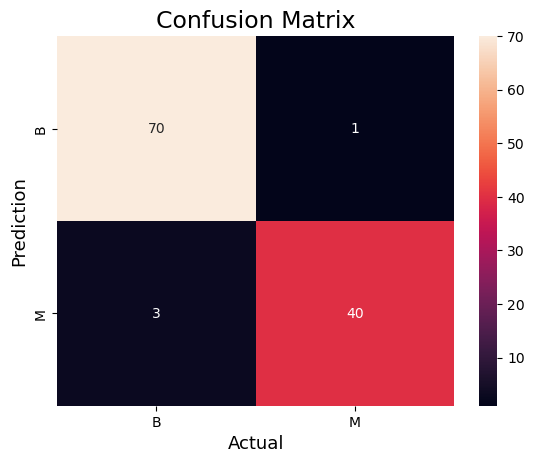

In [44]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['B','M'],
            yticklabels=['B','M'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [39]:
accuracy_rf=accuracy_score(y_test,y_pred)
accuracy_rf

0.9649122807017544

In [41]:
predictions_prob=fit_rf.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,predictions_prob)
auc(fpr,tpr)

0.9980347199475925

### To check the how cross validation internally

In [45]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(fit_rf,X_train,y_train,cv=10)
scores

array([1.        , 0.95652174, 0.95652174, 0.91304348, 0.97826087,
       0.97777778, 0.97777778, 0.97777778, 0.97777778, 0.88888889])

In [ ]:
scores